<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project5:-Customer-segmentation-of-e-commerce-website" data-toc-modified-id="Project5:-Customer-segmentation-of-e-commerce-website-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Project5: Customer segmentation of e-commerce website</a></span><ul class="toc-item"><li><span><a href="#Packages-imported" data-toc-modified-id="Packages-imported-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Packages imported</a></span></li><li><span><a href="#Datasets" data-toc-modified-id="Datasets-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Datasets</a></span></li></ul></li><li><span><a href="#Data-discovery-&amp;-Features-engineering" data-toc-modified-id="Data-discovery-&amp;-Features-engineering-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data discovery &amp; Features engineering</a></span><ul class="toc-item"><li><span><a href="#Order-olist_orders_dataset" data-toc-modified-id="Order-olist_orders_dataset-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Order olist_orders_dataset</a></span></li><li><span><a href="#Payment-olist_order_payments_dataset" data-toc-modified-id="Payment-olist_order_payments_dataset-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Payment olist_order_payments_dataset</a></span></li><li><span><a href="#Items-olist_order_items_dataset" data-toc-modified-id="Items-olist_order_items_dataset-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Items olist_order_items_dataset</a></span></li><li><span><a href="#Customers-olist_order_customers_dataset" data-toc-modified-id="Customers-olist_order_customers_dataset-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Customers olist_order_customers_dataset</a></span></li><li><span><a href="#Reviews-olist_order_reviews_dataset" data-toc-modified-id="Reviews-olist_order_reviews_dataset-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Reviews olist_order_reviews_dataset</a></span></li><li><span><a href="#Product-olist_products_dataset" data-toc-modified-id="Product-olist_products_dataset-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Product olist_products_dataset</a></span></li><li><span><a href="#Geolocalisation-olist_geolocation_dataset" data-toc-modified-id="Geolocalisation-olist_geolocation_dataset-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Geolocalisation olist_geolocation_dataset</a></span></li></ul></li><li><span><a href="#Merging-dataset" data-toc-modified-id="Merging-dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Merging dataset</a></span></li><li><span><a href="#Export-the-DF" data-toc-modified-id="Export-the-DF-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Export the DF</a></span></li></ul></div>

## Project5: Customer segmentation of e-commerce website
***
The objective of this project is to determine different type of Olists' users using unsupervized algorithms.

This project will be divided into two notebooks:  
- One for the data analysis,
- One dedicated to the customer segmentation.  

The following notebook is dedicated to the data exploratory.

The data set can be found here:  
https://www.kaggle.com/olistbr/brazilian-ecommerce

### Packages imported

In [64]:
import numpy as np
import pandas as pd

from datetime import datetime

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection, preprocessing
from sklearn.dummy import DummyClassifier

from sklearn import manifold, cluster
from sklearn.decomposition import PCA

# Graphical libraries
# %pylab inline
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### Datasets

For getting a better data organization, the dataset is divided into several database, that we will later be merged.  
We will first study each database separatly and extract the interesting features. The following picture gives a better understand of the data available.

In [65]:
# Gather the orders dataset
df_order = pd.read_csv('data/olist_orders_dataset.csv')
df_payment = pd.read_csv('data/olist_order_payments_dataset.csv')
df_reviews = pd.read_csv('data/olist_order_reviews_dataset.csv')
df_items = pd.read_csv('data/olist_order_items_dataset.csv')
df_customer = pd.read_csv('data/olist_customers_dataset.csv')
df_products = pd.read_csv('data/olist_products_dataset.csv')
df_sellers = pd.read_csv('data/olist_sellers_dataset.csv')
geo = pd.read_csv('data/olist_geolocation_dataset.csv')

translation = pd.read_csv('data/product_category_name_translation.csv')

# df_geolocation.rename(columns={'geolocation_zip_code_prefix':'customer_zip_code_prefix'})
# df = df.merge(df_geolocation, on='zip_code_prefix', how='left')

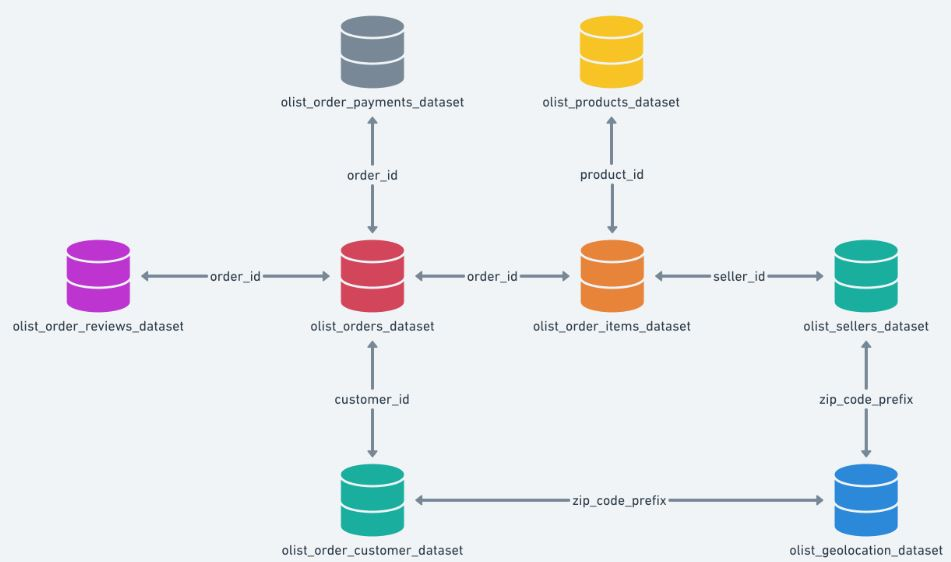

In [3]:
#Display database
from IPython.display import display, Image

display(Image(filename='DB.JPG'))

## Data discovery & Features engineering

The purpose of the following study is to extract features that will enable us to understand the customer and its behavior (location, money spend, purchase dated, type of purchase, ..) and its experience (satisfaction, delays in the delivery, products, ...). 

### Order olist_orders_dataset

The objective here is to study the delivery experience. We can guess that the more a customer is waiting, the less happy he will be about the service. The same goes for the difference between the delivery estimated and the actual delivery.  
The following features extract the number of days for the delivery and the difference between actual and predicted delivery.

In [4]:
# Transform into datetime
df_order['order_delivered_customer_date'] = pd.to_datetime(df_order['order_delivered_customer_date'],format="%Y-%m-%d").apply(lambda x: x.date())
df_order['order_purchase_timestamp'] = pd.to_datetime(df_order['order_purchase_timestamp'],format="%Y-%m-%d").apply(lambda x: x.date())
df_order['order_estimated_delivery_date'] = pd.to_datetime(df_order['order_estimated_delivery_date'],format="%Y-%m-%d").apply(lambda x: x.date())

#Days between the order and the actual delivery
df_order['order_delivery_time'] = df_order['order_delivered_customer_date'] - df_order['order_purchase_timestamp']
df_order['order_delivery_time'] = df_order['order_delivery_time'].apply(lambda x: x.days if x!=np.datetime64('NaT') else np.datetime64('NaT'))

#Days between the estimated delivery and the order
df_order['order_estimated_delivery_time'] = df_order['order_estimated_delivery_date'] - df_order['order_purchase_timestamp']
df_order['order_estimated_delivery_time'] = df_order['order_estimated_delivery_time'].apply(lambda x: x.days if x!=np.datetime64('NaT') else np.datetime64('NaT'))

#Difference between estimated delivery and actual delivery
df_order['order_estimated_delivery_vs_actual'] = df_order['order_estimated_delivery_date'] - df_order['order_delivered_customer_date']
df_order['order_estimated_delivery_vs_actual'] = df_order['order_estimated_delivery_vs_actual'].apply(lambda x: x.days if x!=np.datetime64('NaT') else np.datetime64('NaT'))

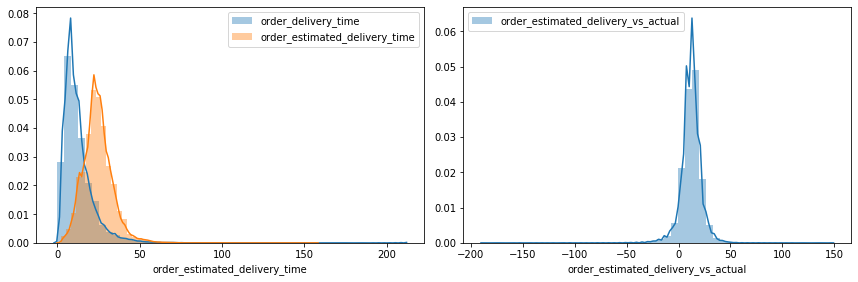

In [5]:
#Plotting delivery info
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

sns.distplot(df_order['order_delivery_time'].dropna(),ax=ax1,label='order_delivery_time')
sns.distplot(df_order['order_estimated_delivery_time'].dropna(),ax=ax1,label='order_estimated_delivery_time')
sns.distplot(df_order['order_estimated_delivery_vs_actual'].dropna(),ax=ax2,label='order_estimated_delivery_vs_actual')
ax1.legend()
ax2.legend()
fig.tight_layout(pad=1.0)

Another interesting information about the customer is the number of days since its last order, in order to see if the customer has been active recently. This information could also be used to determine the frequency, if a RFM segmentation is made.

In [6]:
#Number of days since last order
df_order['order_purchase_timestamp'] = pd.to_datetime(df_order['order_purchase_timestamp'],format="%Y-%m-%d").apply(lambda x: x.date())
last_date = df_order['order_purchase_timestamp'].max()
df_order['nb_days_last_order'] = df_order['order_purchase_timestamp'].apply(lambda x: (last_date - x).days)

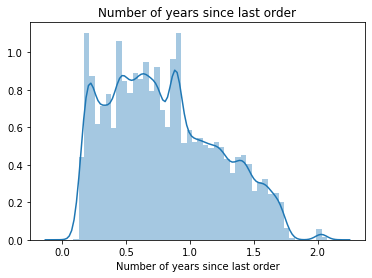

In [7]:
#Number of days since last order per order
g = sns.distplot(df_order['nb_days_last_order']/365)
g.set_title('Number of years since last order')
g.set_xlabel('Number of years since last order')
plt.show()

In [8]:
#For merging purpose, we will only keep interesting features
to_drop = ['order_purchase_timestamp', 'order_delivered_carrier_date','order_estimated_delivery_date', 'order_delivered_customer_date',
          'order_approved_at']
order = df_order.drop(columns=to_drop)

### Payment olist_order_payments_dataset

We need to get the total price per command, since it is possible to have a sequential payment, we need to group the orders with the same id.

In [66]:
#Get the total price per order
payment = df_payment.groupby('order_id')['payment_value'].agg('sum')
payment = payment.to_frame()
payment['order_id'] = payment.index
payment = payment.reset_index(drop=True)
payment.columns = ['total_price','order_id']

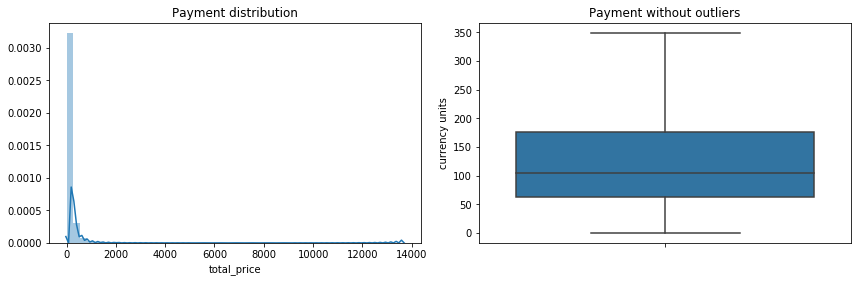

In [61]:
#Total price distribution
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

sns.distplot(payment['total_price'].dropna(),ax=ax1,label='Total Payment')
ax1.set_title('Payment distribution')
sns.boxplot(payment['total_price'],ax=ax2,  showfliers=False,orient="v")
ax2.set_ylabel("currency units")
ax2.set_title('Payment without outliers')
fig.tight_layout(pad=1.0)

The 3 variables bellow explain the customers payments habits. We can see that most of the payments are with credit car, and half of the customers use payment installments. However, most customers only pay one time. 

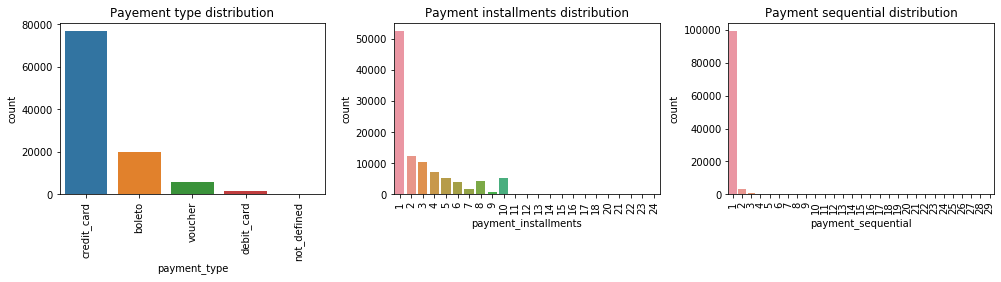

In [67]:
#Price distribution
fig = plt.figure(figsize=(14,4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

g2 = sns.countplot(df_payment['payment_type'],ax=ax1)
ax1.set_title('Payement type distribution')
g2.set_xticklabels(g2.get_xticklabels(), rotation=90)


#Convert 0 payment installments into 1 (it concerns only 3 orders)
df_payment['payment_installments'] = df_payment['payment_installments'].apply(lambda x: x if x!=0 else 1)
g1 = sns.countplot(df_payment['payment_installments'].dropna(),ax=ax2)
ax2.set_title('Payment installments distribution')
g1.set_xticklabels(g1.get_xticklabels(), rotation=90)

sns.countplot(df_payment['payment_sequential'],ax=ax3)
ax3.set_title('Payment sequential distribution')

plt.xticks(rotation=90)
plt.tight_layout(pad=1.0)

Since the majority of payment are not sequential, we will convert it into a category with either people paying one time or more than one time. 

In [13]:
#Convert payment sequential, 0 if the 1 time payment, 1 if it is sequential
df_payment['payment_sequential'] = df_payment['payment_sequential'].apply(lambda x: 0 if (x<2 and x!=0) else 1)

In [14]:
#Transform the payment type into categories with a get dummies
payment = payment.merge(df_payment[['order_id','payment_type','payment_sequential','payment_installments']],on='order_id',how='left')
payment = pd.get_dummies(payment,columns=['payment_type'])

### Items olist_order_items_dataset

As we can see, we have a few expensives orders and the distribution is uneven. We will need to standardize the dataset in order to study it later on. 

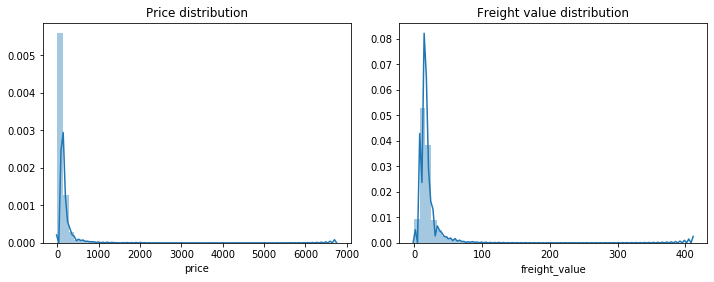

In [15]:
#Price and freight distribution
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

sns.distplot(df_items['price'].dropna(),ax=ax1)
ax1.set_title('Price distribution')

sns.distplot(df_items['freight_value'].dropna(),ax=ax2)
ax2.set_title('Freight value distribution')

plt.tight_layout
fig.tight_layout(pad=1.0)

**Number of items bought per order**

Most of the orders are 1 item purchase.

In [16]:
# #Reset
# df_items = pd.read_csv('data/olist_order_items_dataset.csv

#Get the number of items purchased by order
items = df_items.groupby('order_id')['order_item_id'].count()
items = items.to_frame()
items['order_id'] = items.index
items = items.reset_index(drop=True)
items.columns = ['nb_items_bought','order_id']

#For merging purpose
items = items.merge(df_items[['order_id','product_id']],on='order_id',how='left')

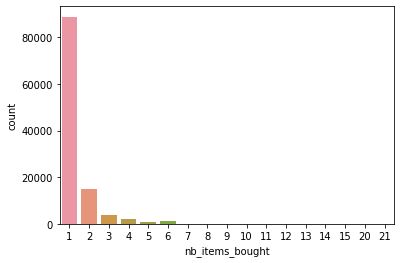

In [17]:
ax = sns.countplot(items['nb_items_bought'])

### Customers olist_order_customers_dataset

**Number of orders per customers**

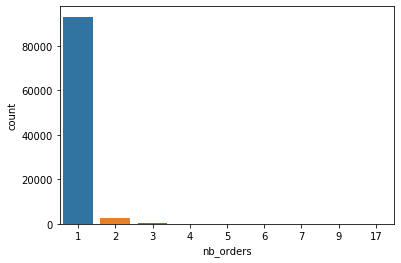

In [18]:
#Get the number of commands per client
customer = df_customer.groupby('customer_unique_id').size().reset_index()
customer.columns = ['customer_unique_id','nb_orders']

#Plot number of commands per customer
ax = sns.countplot(customer['nb_orders'])

**Customers location**

We will consider the 10 most states and combine the remaining states into an 'other' category. We can assume that the remaining categories are less populated states.

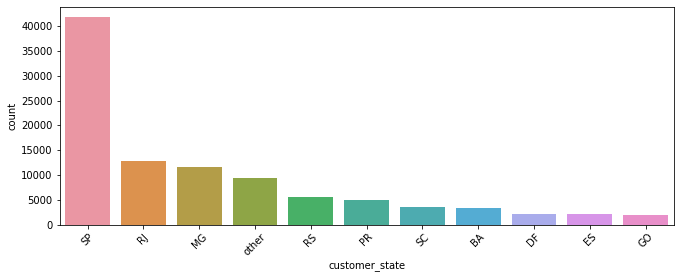

In [19]:
count_states = df_customer['customer_state'].value_counts()
count_states = count_states[:10]
df_customer['customer_state'] = df_customer['customer_state'].apply(lambda x: x if x in count_states else 'other')

fig = plt.figure(figsize=(11,4))
sns.countplot(x='customer_state',data=df_customer,order=df_customer['customer_state'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

In [20]:
#For later merging
customer = customer.merge(df_customer,on='customer_unique_id',how='left')

#Get dummies on the state feature
customer = pd.get_dummies(customer,columns=['customer_state'])
customer.drop(columns=['customer_zip_code_prefix','customer_city'],inplace=True)

The same reasoning goes for the customer city. We can assume that the cities with the bigger order are big citties, we will group the smaller cities into a 'other' category.

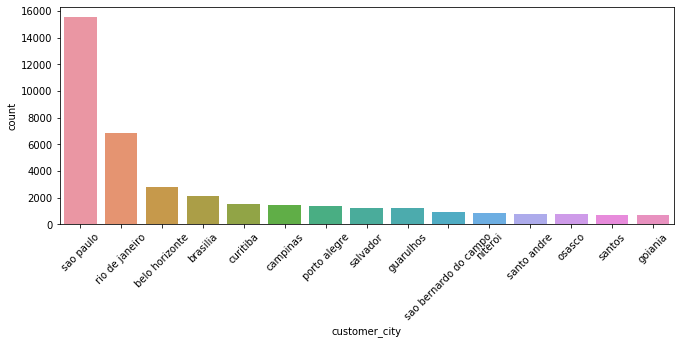

In [21]:
#Plot distribution
fig = plt.figure(figsize=(11,4))
sns.countplot(x='customer_city',data=df_customer,order=df_customer['customer_city'].value_counts()[:15].index)
plt.xticks(rotation=45)
plt.show()

#Get 10 biggest cities where customers are
count_city = df_customer['customer_city'].value_counts()
cities = count_city[:10]

#Take only the biggest cities and convert the rest into "other" city
# df_customer['customer_city'] = df_customer['customer_city'].apply(lambda x: x if x in cities else 'other')

In [22]:
#Convert into dummies categories
# df = pd.get_dummies(df,columns=['customer_state']#,'customer_city'])

### Reviews olist_order_reviews_dataset

The score review and review message lenght will allow us to understand the customer hapiness towards this service.

**Score review**  

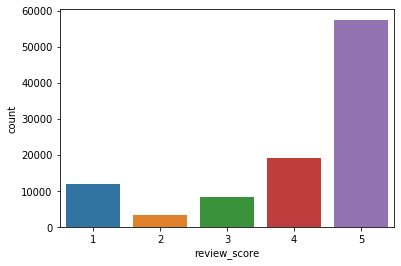

In [23]:
ax1 = sns.countplot(df_reviews['review_score'])

**Lenght of message review**  
Usually the people which write a review are the ones that are unsatisfied. Hence the lenght of the message should give us a good idea about the customer satisfaction. We can guess that the longer the message is, the more disatisfied a customer is.

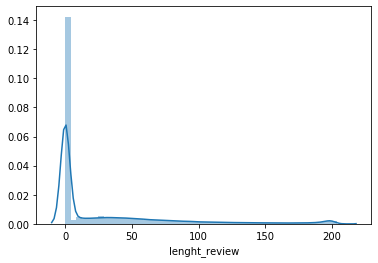

In [24]:
df_reviews['lenght_review'] = df_reviews['review_comment_message'].apply(lambda x: len(str(x)) if str(x)!='nan' else 0)
sns.distplot(df_reviews['lenght_review'])
plt.show()

In [25]:
#For merging purpose
to_drop = ['review_id', 'review_comment_title','review_comment_message', 
 'review_creation_date','review_answer_timestamp']

reviews = df_reviews.drop(columns=to_drop)

We can guess that the more a customer is satisfied, the less he will write a review, since we tend to write a review when we are unhappy. As we can see, the lenght of the review drop decrease as the review score increase.

In [26]:
reviews.groupby('review_score')['lenght_review'].mean()

review_score
1    79.138978
2    67.634930
3    37.669965
4    19.642083
5    18.770376
Name: lenght_review, dtype: float64

### Product olist_products_dataset

**Remove sub categories**

We have here 73 categories, which is a lot if we want to convert this feature with a get dummies. The objective is to regroup some categories.
As we can see, several categories are similar, and can be categorized as one bigger category. For instance the construcao_ferramentas_iluminacao and construcao_ferramentas_construcao have the same root, hence we can make the hypothesis that they are part of the bigger category. To further reduce its number, based on the 52 categories, I created sub-categories based on their theme.

In [70]:
df_products = df_products.merge(translation, how='left',on='product_category_name')
print(f"They are {df_products.product_category_name.nunique()} categories initialy")

They are 73 categories initialy


In [71]:
df_products['product_category_name_english'].unique()

array(['perfumery', 'art', 'sports_leisure', 'baby', 'housewares',
       'musical_instruments', 'cool_stuff', 'furniture_decor',
       'home_appliances', 'toys', 'bed_bath_table',
       'construction_tools_safety', 'computers_accessories',
       'health_beauty', 'luggage_accessories', 'garden_tools',
       'office_furniture', 'auto', 'electronics', 'fashion_shoes',
       'telephony', 'stationery', 'fashion_bags_accessories', 'computers',
       'home_construction', 'watches_gifts',
       'construction_tools_construction', 'pet_shop', 'small_appliances',
       'agro_industry_and_commerce', nan, 'furniture_living_room',
       'signaling_and_security', 'air_conditioning', 'consoles_games',
       'books_general_interest', 'costruction_tools_tools',
       'fashion_underwear_beach', 'fashion_male_clothing',
       'kitchen_dining_laundry_garden_furniture',
       'industry_commerce_and_business', 'fixed_telephony',
       'construction_tools_lights', 'books_technical',
       'hom

In [28]:
#Some categories are subcategories, we will only take the global category
df_products['product_category_name_english'] = df_products['product_category_name_english'].apply(lambda x: str(x).split('_')[0])

print(df_products['product_category_name_english'].nunique())
print(df_products['product_category_name_english'].unique())

52
['perfumery' 'art' 'sports' 'baby' 'housewares' 'musical' 'cool'
 'furniture' 'home' 'toys' 'bed' 'construction' 'computers' 'health'
 'luggage' 'garden' 'office' 'auto' 'electronics' 'fashion' 'telephony'
 'stationery' 'watches' 'pet' 'small' 'agro' 'nan' 'signaling' 'air'
 'consoles' 'books' 'costruction' 'kitchen' 'industry' 'fixed' 'party'
 'drinks' 'market' 'la' 'fashio' 'audio' 'food' 'music' 'tablets'
 'christmas' 'dvds' 'arts' 'cine' 'diapers' 'flowers' 'security' 'cds']


In [29]:
#Regroup the categories into a larger category
cat = {
    "art" : ['art', 'arts','cine','music','books','musical','fashio'],
    "house" : ['housewares', 'garden','home','kitchen','bed','furniture','stationery','flowers','security','luggage','pet'],
    "electronics" : ['telephony', 'computers', 'electronics', 'consoles', 'tablets','cds','dvds','audio','signaling'],
    "industry" : ['auto','construction','costruction'],
    "baby" : ['baby','diapers','toy','toys'],
    "health" : ['sport','air','health','food','drinks'],
    "gift" : ['watches','christmas','fashion'],
    "others":['market', 'agro', 'party', 'fixed', 'la','small','cool' ]
}

def get_cat(x):
    """Reduce the number of product category"""
    if str(x)=='nan':
        return x
    else:
        for i,v in cat.items():
            if str(x) in v:
                return i
            
df_products['product_category_name_english'] = df_products['product_category_name_english'].apply(lambda x: get_cat(x) if get_cat(x) is not None else x)

#Check result
print(df_products['product_category_name_english'].unique())

['perfumery' 'art' 'sports' 'baby' 'house' 'others' 'industry'
 'electronics' 'health' 'office' 'gift' 'nan']


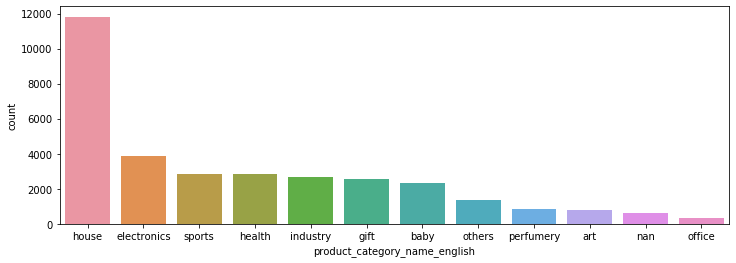

In [30]:
fig = plt.figure(figsize=(12,4))
ax = sns.countplot(x='product_category_name_english', data=df_products, order=df_products['product_category_name_english'].value_counts(ascending=False).index)
# ax.set_xticklabels(labels=df['product_category_name_english'].value_counts(ascending=False).index.index,rotation=45) 
plt.show()

In [31]:
#Get dummies on the products
df_products = pd.get_dummies(df_products,columns=['product_category_name_english'])

In [32]:
#Drop the unwanted features
to_drop = ['product_category_name','product_name_lenght','product_description_lenght','product_photos_qty',
          'product_weight_g','product_length_cm', 'product_height_cm', 'product_width_cm']

products = df_products.drop(columns=to_drop)

### Geolocalisation olist_geolocation_dataset

There are some outliers coordinates in the dataset that are outside of brazilian territory. Lets guarantee that all coordinates are within a rectangle delimited by the limits of Brazil.

In [33]:
# Removing some outliers
#Brazils most Northern spot is at 5 deg 16′ 27.8″ N latitude.;
geo = geo[geo.geolocation_lat <= 5.27438888]
#it’s most Western spot is at 73 deg, 58′ 58.19″W Long.
geo = geo[geo.geolocation_lng >= -73.98283055]
#It’s most southern spot is at 33 deg, 45′ 04.21″ S Latitude.
geo = geo[geo.geolocation_lat >= -33.75116944]
#It’s most Eastern spot is 34 deg, 47′ 35.33″ W Long.
geo = geo[geo.geolocation_lng <=  -34.79314722]

In [34]:
from datashader.utils import lnglat_to_meters as webm
#Transform latitude & longitude into x,y location
x, y = webm(geo.geolocation_lng, geo.geolocation_lat)
geo['x'] = pd.Series(x)
geo['y'] = pd.Series(y)

# transforming the prefixes to int for plotting purposes
geo['geolocation_zip_code_prefix'] = geo['geolocation_zip_code_prefix'].astype(int)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
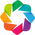

In [35]:
# plot wtih holoviews + datashader - bokeh with map background
import holoviews as hv
import geoviews as gv
import datashader as ds
from colorcet import fire, rainbow, bgy, bjy, bkr, kb, kr
from datashader.colors import colormap_select, Greys9
from holoviews.streams import RangeXY
from holoviews.operation.datashader import datashade, dynspread, rasterize
from bokeh.io import push_notebook, show, output_notebook
# output_notebook()
hv.extension('bokeh')

%opts Overlay [width=800 height=600 toolbar='above' xaxis=None yaxis=None]
%opts QuadMesh [tools=['hover'] colorbar=True] (alpha=0 hover_alpha=0.2)

T = 0.05
PX = 1

def plot_map(data, label, agg_data, agg_name, cmap):
    url="http://server.arcgisonline.com/ArcGIS/rest/services/Canvas/World_Dark_Gray_Base/MapServer/tile/{Z}/{Y}/{X}.png"
    geomap = gv.WMTS(url)
    points = hv.Points(gv.Dataset(data, kdims=['x', 'y'], vdims=[agg_name]))
    agg = datashade(points, element_type=gv.Image, aggregator=agg_data, cmap=cmap)
    zip_codes = dynspread(agg, threshold=T, max_px=PX)
    hover = hv.util.Dynamic(rasterize(points, aggregator=agg_data, width=50, height=25, streams=[RangeXY]), operation=hv.QuadMesh)
    hover = hover.options(cmap=cmap)
    img = geomap * zip_codes * hover
    img = img.relabel(label)
    return img

In [36]:
#Draw a distribution in the Brazilian map
brazil = geo
agg_name = 'geolocation_zip_code_prefix'
brazil[agg_name].describe().to_frame()

plot_map(brazil, 'Zip Codes in Brazil', ds.min(agg_name), agg_name, cmap=rainbow)

:DynamicMap   []
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .RGB.I      :RGB   [x,y]   (R,G,B,A)
      .QuadMesh.I :QuadMesh   [x,y]   (geolocation_zip_code_prefix)

**Distance between seller and buyer**

An interesting information will be the distance between the supplier and buyer. We can guess that the greater the distance, the more problem could happen during transportation and the more likely the satisfaction could decrease. 

In [37]:
geo.columns

Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state', 'x', 'y'],
      dtype='object')

In [38]:
#Get the center of each zip_code
x = geo.groupby('geolocation_zip_code_prefix')['x'].mean().reset_index()
y = geo.groupby('geolocation_zip_code_prefix')['y'].mean().reset_index()

In [39]:
geo_dist = x.merge(y,on='geolocation_zip_code_prefix',how='left')

#Gather customer and seller 
temp = df_order.merge(df_customer,on='customer_id',how='left')
temp = temp.merge(df_items,on='order_id',how='left')
temp = temp.merge(df_sellers,on='seller_id',how='left')

In [40]:
#Get the customer location
customer_zip_code = temp['customer_zip_code_prefix'].to_frame()
customer_zip_code.columns = ['geolocation_zip_code_prefix']

#Get the seller zip code
seller_zip_code = temp['seller_zip_code_prefix'].to_frame()
seller_zip_code.columns = ['geolocation_zip_code_prefix']

#Get the x,y location for each seller and customer per order
dist1 = customer_zip_code.merge(geo_dist,on="geolocation_zip_code_prefix",how='left')
dist1.columns = ['zip_code_prefix_seller','x_customer','y_customer']

dist2 = seller_zip_code.merge(geo_dist,on="geolocation_zip_code_prefix",how='left')
dist2.columns = ['zip_code_prefix_seller','x_seller','y_seller']

#Concat the two DF
dist = pd.concat([dist1, dist2], axis=1)

#Get the distance between customer and seller
dist['distance'] = dist.apply(lambda row: np.sqrt((row['x_customer']-row['x_seller'])**2 
                                                  + (row['y_customer']-row['y_seller'])**2),axis=1)
#Convert the distance km
dist['distance'] = dist['distance']/1000
dist['order_id'] = temp['order_id']

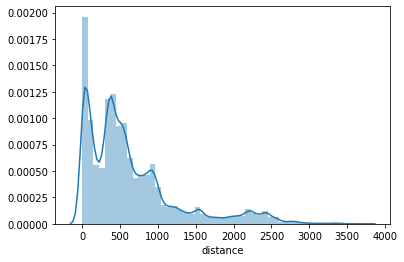

In [41]:
#Plot the distance distribution
#The maximum distance in Brazil can be 3700 km
g = sns.distplot(dist['distance'].dropna())

In [42]:
distance = dist[['order_id','distance']]

## Merging dataset

In [43]:
# Merging the different dataset with primary key
df = order.merge(payment, on='order_id', how='left')
df = df.merge(reviews, on='order_id', how='left')
df = df.merge(items, on='order_id', how='left')
df = df.merge(customer, on='customer_id', how='left')
df = df.merge(products, on='product_id', how='left')
df = df.merge(distance,on='order_id',how='left')

**Duplicate**

We have lots of dupplicated rows that need to be remove from the dataset.

In [44]:
#Remove duplicate
duplicateRowsDF = df[df.duplicated(keep='last')]
print(f'There are {duplicateRowsDF.shape[0]} duplicated rows')
idx = duplicateRowsDF.index
df.drop(idx,axis=0,inplace = True)

There are 56236 duplicated rows


**Order Status**

Most of the orders are delivered, we will not study the other ones, since we would like to study the actual user of the company. 

In [45]:
# print(df['order_status'].unique())
for i in df['order_status'].unique():
    print(i,":",sum(df['order_status']==i))

delivered : 106311
invoiced : 338
shipped : 1163
processing : 316
unavailable : 635
canceled : 651
created : 5
approved : 2


In [46]:
idx_drop = df[df['order_status']!='delivered'].index
df.drop(index=idx_drop,inplace=True)
df.reset_index(inplace=True,drop=True)

**NAN values**

We have two columns with lots of missing values. Since we will not have use NLP and they are not relevant to thhis project, we will remove those features.  
As for the rest, we have less than 0,5% of missing data, so we will remove the missing data from the data set.

In [47]:
df[df.columns[df.isna().sum()>0]].isna().sum()

order_delivery_time                     8
order_estimated_delivery_vs_actual      8
total_price                             1
payment_sequential                      1
payment_installments                    1
payment_type_boleto                     1
payment_type_credit_card                1
payment_type_debit_card                 1
payment_type_not_defined                1
payment_type_voucher                    1
distance                              517
dtype: int64

In [48]:
df.dropna(inplace=True)
df.reset_index(inplace=True,drop=True)

**Total money spent by customer**  
We have the total price per order but not yet the amount of money spend by each customer. This information could only be gathered when all dataset are merged.

In [49]:
# df_total_money = df.groupby('customer_unique_id')['total_price'].sum()
a = df.groupby('customer_unique_id')['total_price'].sum().reset_index()
a.columns = ['customer_unique_id','total_money']
df = df.merge(a, on='customer_unique_id',how='left')

**Total product bought by categories**

In [50]:
products = ['product_category_name_english_art',
'product_category_name_english_baby',
'product_category_name_english_electronics',
'product_category_name_english_gift',
'product_category_name_english_health',
'product_category_name_english_house',
'product_category_name_english_industry',
'product_category_name_english_nan',
'product_category_name_english_office',
'product_category_name_english_others',
'product_category_name_english_perfumery',
'product_category_name_english_sports']

product_bought = {}
for i in products:
#     print(f"{df[i].sum()} products for {i}")
    product_bought[i]= df[i].sum()

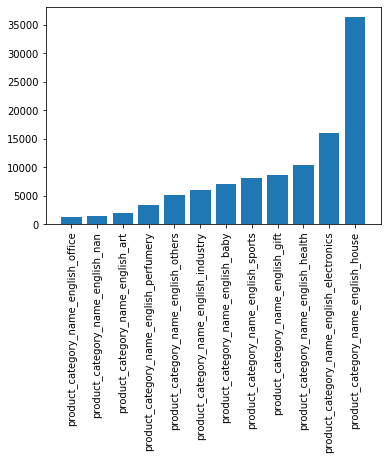

In [51]:
product_bought = {k: v for k, v in sorted(product_bought.items(), key=lambda item: item[1])}
names = list(product_bought.keys())
values = list(product_bought.values())

#tick_label does the some work as plt.xticks()
plt.bar(range(len(product_bought)),values,tick_label=names)
plt.xticks(rotation=90)
plt.show()

## Export the DF

In [52]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_delivery_time',
       'order_estimated_delivery_time', 'order_estimated_delivery_vs_actual',
       'nb_days_last_order', 'total_price', 'payment_sequential',
       'payment_installments', 'payment_type_boleto',
       'payment_type_credit_card', 'payment_type_debit_card',
       'payment_type_not_defined', 'payment_type_voucher', 'review_score',
       'lenght_review', 'nb_items_bought', 'product_id', 'customer_unique_id',
       'nb_orders', 'customer_state_BA', 'customer_state_DF',
       'customer_state_ES', 'customer_state_GO', 'customer_state_MG',
       'customer_state_PR', 'customer_state_RJ', 'customer_state_RS',
       'customer_state_SC', 'customer_state_SP', 'customer_state_other',
       'product_category_name_english_art',
       'product_category_name_english_baby',
       'product_category_name_english_electronics',
       'product_category_name_english_gift',
       'product_category_name_english_health',
     

In [53]:
#Drop the primary keys
columns_unused = ['order_id','customer_id','order_status','product_id','customer_unique_id']
df_cleaned = df.drop(columns=columns_unused)

In [54]:
df_cleaned.describe()

,order_delivery_time,order_estimated_delivery_time,order_estimated_delivery_vs_actual,nb_days_last_order,total_price,payment_sequential,payment_installments,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,...,product_category_name_english_health,product_category_name_english_house,product_category_name_english_industry,product_category_name_english_nan,product_category_name_english_office,product_category_name_english_others,product_category_name_english_perfumery,product_category_name_english_sports,distance,total_money
count,105785.000000,105785.000000,105785.000000,105785.000000,105785.000000,105785.000000,105785.000000,105785.000000,105785.000000,105785.000000,...,105785.000000,105785.000000,105785.000000,105785.000000,105785.000000,105785.000000,105785.000000,105785.000000,105785.000000,105785.000000
mean,12.350749,24.505053,12.154304,288.565959,166.754653,0.030288,2.958557,0.191625,0.751846,0.014955,...,0.098171,0.343905,0.056010,0.014274,0.012592,0.049175,0.031356,0.076221,642.125751,286.367144
std,9.488894,8.782399,10.226011,152.876938,223.375239,0.171379,2.771386,0.393581,0.431944,0.121373,...,0.297547,0.475012,0.229942,0.118620,0.111504,0.216235,0.174279,0.265352,615.987878,792.561166
min,0.000000,3.000000,-188.000000,49.000000,9.590000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.070000
25%,7.000000,19.000000,7.000000,164.000000,63.690000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,207.086859,68.450000
50%,10.000000,24.000000,13.000000,270.000000,109.410000,0.000000,2.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,472.977238,125.230000
75%,15.000000,29.000000,17.000000,399.000000,186.440000,0.000000,4.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,866.834388,236.970000
max,210.000000,156.000000,147.000000,744.000000,13664.080000,1.000000,24.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3565.943733,20241.120000


In [55]:
import os
#Export the cleaned data into a csv file
if os.path.exists("data/cleaned_dataframe.csv"):
    os.remove('data/cleaned_dataframe.csv')
    export_csv = df_cleaned.to_csv (r'data/cleaned_dataframe.csv', index = None, header=True)
else:
    export_csv = df_cleaned.to_csv (r'data/cleaned_dataframe.csv', index = None, header=True)